<a href="https://colab.research.google.com/github/AkanMNdem/DS2002F24/blob/main/api_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import json
import pandas as pd
import json
import requests

In [30]:
stock=input("Input stock(s) to research. If there is more than one, separate them by commas")
print("The stock(s) to research are: " + stock)

Input stock(s) to research. If there is more than one, separate them by commasaapl,googl
The stock(s) to research are: aapl,googl


In [21]:
apikey="7NLRbwsihN6p7S4uiebdLalnazzY5eHg32bFGtoO"

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols": stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)
json_stock =  response.json()


In [22]:
trending_url = "https://yfapi.net/v1/finance/trending/US"
trending_response = requests.get(trending_url, headers=headers)
trending_data = trending_response.json()

In [23]:
# Display user entered data
for stock in json_stock['quoteResponse']['result']:
    stock_name = stock.get("longName", "N/A")
    stock_price = stock.get("regularMarketPrice", "N/A")
    fiftyTwoWeekHigh = stock.get("fiftyTwoWeekHigh", "N/A")
    fiftyTwoWeekLow = stock.get("fiftyTwoWeekLow", "N/A")
    symbol = stock.get("symbol", "N/A")
    print(f"{symbol} ({stock_name}): \n Price: ${stock_price}, 52-week high: {fiftyTwoWeekHigh}, 52-week low: {fiftyTwoWeekLow}")

# Display trending data
if 'finance' in trending_data and 'result' in trending_data['finance'] and len(trending_data['finance']['result']) > 0:
    trending_stocks = trending_data['finance']['result'][0]['quotes']
    print("\nTop 5 Trending Stocks:")
    for stock in trending_stocks[:5]:
        print(f"Symbol: {stock['symbol']}")
else:
    print("No trending data available.")

AAPL (Apple Inc.): 
 Price: $233.0, 52-week high: 237.23, 52-week low: 164.08
GOOGL (Alphabet Inc.): 
 Price: $165.85, 52-week high: 191.75, 52-week low: 120.21

Top 5 Trending Stocks:
Symbol: AAPL
Symbol: SMCI
Symbol: DJT
Symbol: HOLO
Symbol: STLA


In [26]:
# Convert Data to CSV file
df = pd.DataFrame([{
    "Stock Name": stock_name,
    "Current Price": stock_price,
    "Target Mean Price": stock_price,
    "52 Week High": fiftyTwoWeekHigh,
    "52 Week Low": fiftyTwoWeekLow
}])
df.to_csv("stock_data.csv", index=False)


{'chart': {'result': [{'meta': {'currency': 'USD', 'symbol': 'AAPL', 'exchangeName': 'NMS', 'fullExchangeName': 'NasdaqGS', 'instrumentType': 'EQUITY', 'firstTradeDate': 345479400, 'regularMarketTime': 1727726401, 'hasPrePostMarketData': True, 'gmtoffset': -14400, 'timezone': 'EDT', 'exchangeTimezoneName': 'America/New_York', 'regularMarketPrice': 233.0, 'fiftyTwoWeekHigh': 233.0, 'fiftyTwoWeekLow': 229.655, 'regularMarketDayHigh': 233.0, 'regularMarketDayLow': 229.655, 'regularMarketVolume': 52779736, 'longName': 'Apple Inc.', 'shortName': 'Apple Inc.', 'chartPreviousClose': 226.47, 'priceHint': 2, 'currentTradingPeriod': {'pre': {'timezone': 'EDT', 'start': 1727769600, 'end': 1727789400, 'gmtoffset': -14400}, 'regular': {'timezone': 'EDT', 'start': 1727789400, 'end': 1727812800, 'gmtoffset': -14400}, 'post': {'timezone': 'EDT', 'start': 1727812800, 'end': 1727827200, 'gmtoffset': -14400}}, 'dataGranularity': '1d', 'range': '5d', 'validRanges': ['1d', '5d', '1mo', '3mo', '6mo', '1y', 

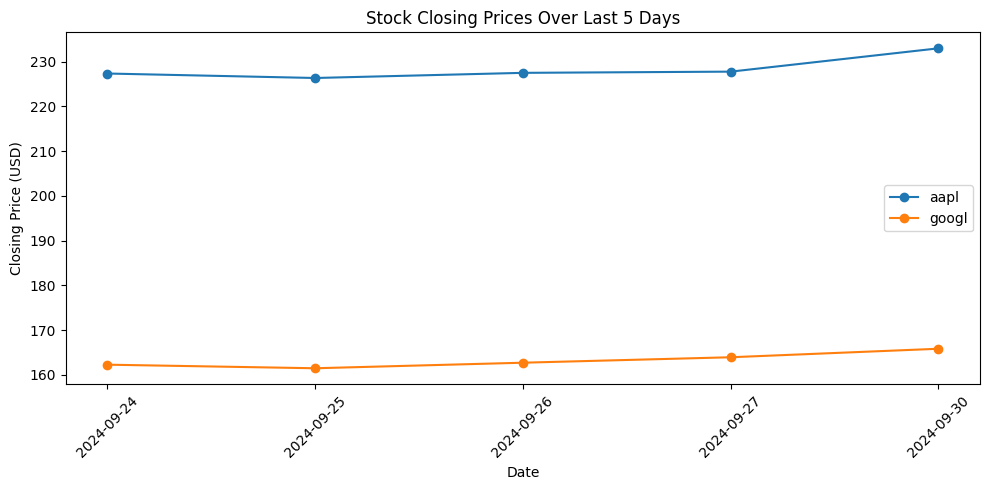

In [31]:
# Graph attempt
import matplotlib.pyplot as plt
import datetime

def get_stock_data(ticker):
    url = f"https://yfapi.net/v8/finance/chart/{ticker}"
    headers = {'x-api-key': apikey}
    querystring = {"range": "5d", "interval": "1d"}

    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()
    print(data)

    if data['chart']['error'] is None:
        timestamps = data['chart']['result'][0]['timestamp']
        closing_prices = data['chart']['result'][0]['indicators']['quote'][0]['close']
        dates = [datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d') for ts in timestamps]
        return dates, closing_prices
    else:
        print(f"Error retrieving data for {ticker}")
        return None, None

plt.figure(figsize=(10, 5))
for stock in stock.split(","):
    dates, closing_prices = get_stock_data(stock)

    if dates and closing_prices:
        plt.plot(dates, closing_prices, marker='o', label=stock)
plt.title("Stock Closing Prices Over Last 5 Days")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


plt.show()